In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
string = []

In [84]:
with open('KohonenMap.txt', 'r') as file:
    for item in enumerate(file):
        string.append(item[1])

In [85]:
I = np.size(string)

In [86]:
for k in range (I):
    string[k] = string[k].split(' ')
    string[k][-1] = string[k][-1].strip()

In [88]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [89]:
stringName_k = ""
names = []
k = 0
isFirstNameSymb = True
for x in string:
    q = string.index(x)
    isFirstNameSymb = True
    for elem in x:
        if (not isfloat(elem)):
            if (isFirstNameSymb):
                k = x.index(elem)
            isFirstNameSymb = False
            
            if elem != x[-1]:
                stringName_k += (str(elem) + "_")
            else:
                stringName_k += str(elem)
    string[q] = x[0:(k)]
    names.append(stringName_k)
    stringName_k  = ""

In [92]:
J = np.size(string[0])
featureList = np.zeros((I, J))
dist = []

for count, val in enumerate(string):
        dist.append(np.linalg.norm(val));
        
distSort = dist
dataSorted = np.zeros((I, J))
for val in distSort:
    dataSorted[np.where(dist == val)[0][0].item()] = string[np.where(dist == val)[0][0].item()]
    #print(type(np.where(dist == val)[0][0].item()))

In [95]:
for j in range(J):

    for i in range(I):
        featureList[i][j] = dataSorted[i][j]
        
        if ((abs(float(dataSorted[i][j])) > 1.0) and (j != 0)):
            if (float(dataSorted[i][j]) < 0):
                featureList[i][j] = -1.0;
            else:
                featureList[i][j] = +1.0;
N = np.arange(0,I, 1)

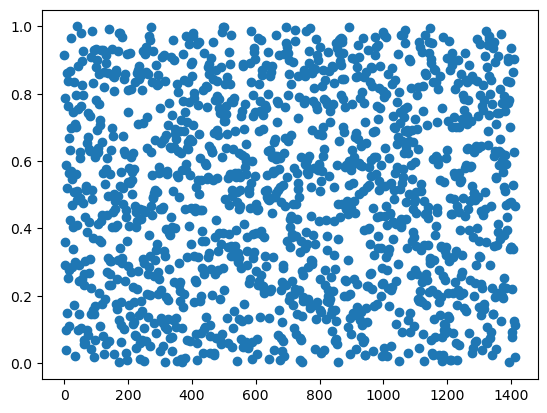

In [97]:
plt.scatter(N, featureList[:, 0])

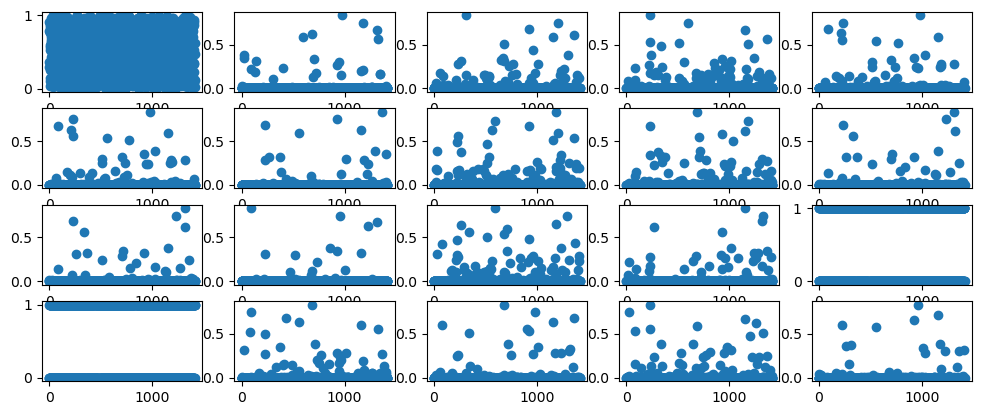

In [98]:
fig,axs = plt.subplots(4,5, figsize = plt.figaspect(0.4))
for i in range(4):
    for j in range(5):
        axs[i][j].scatter(N, featureList[:, i * 4 + j])

In [99]:
coord = [[0,0,0],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0],[1,0,-1], [1 , 1, -2], 
         [ 2, 0, -2], [ 3, -1, -2], [ 3, -2, -1], [ 2, -1, -1], [ 2, -2, 0], [ 1, -2, 1], 
         [ 0, -2, 2], [ -1, -1, 2], [ -2, 0, 2], [ -1, 2, -1], [ -2, 2, 0], [ -2, 1, 1]]
#20

In [100]:
coord = [[-4, 0, 4], [-4, 1, 3], [-4, 2, 2], [-4, 3, 1], [-4, 4, 0], [-3, -1, 4], [ -3, 0, 3], [-3, 1, 2], [-3, 2, 1], 
         [ -3, 3, 0], [-3, 4, -1], [-2, -1, 4], [ -2, -1, 3], [ -2, 0, 2], [ -2, 1, 1], [ -2, 2, 0],
         [ -2, 3, -1], [-2, 4, -2], [-1, -3, 4], [ -1, -2, 3], [ -1, -1, 2], [-1,0,1], [-1,1,0], [ -1, 2, -1],  [ -1, 3, -2], 
         [-1, 4, -3], [0, -4, 4], [ 0, -3, 3], [ 0, -2, 2], [0,-1,1], [0,0,0], [0,1,-1], [0, 2, -2], [ 0, 3, -3], [0, 4, -4],
         [1, -4, 3], [ 1, -3, 2], 
         [ 1, -2, 1], [1,-1,0], [1,0,-1], [1 , 1, -2], [ 1, 2, -3],[1, 3, -4], [2, -4, 2], [ 2, -3, 1], [ 2, -2, 0], 
         [ 2, -1, -1], [ 2, 0, -2], [ 2, 1, -3], [2, 2, -4], [3, -4 , -1], [ 3, -3, 0], [ 3, -2, -1], [ 3, -1, -2], 
         [ 3, 0, -3], [3, 1, -4], [4, -4, 0], [4, -3, -1], [4, -2, -2], [4, -1, -3], [4, 0, -4]]
#61

In [101]:
def hexagonal_grid(N):
    if N <= 0:
        return []

    hex_grid = []
    for i in range(N):
        for j in range(-i, i+1):
            for k in range(-i, i+1):
                if j + k <= i and j + k >= -i:
                    hex_grid.append((j, -j-k, k))

    return hex_grid

In [102]:
def hexagonal_grid2(N):
    hex_grid = []
    for i in range(N):
        x = i % 16 * 1.5
        y = -i // 16 * 1.5
        hex_grid.append((x, y))
    return hex_grid

In [106]:
coord = list(set(hexagonal_grid2(1415)))
print(np.shape(coord))

(1415, 2)


In [109]:
I

1415

In [107]:
#coord = list(set(hexagonal_grid(23)))
#print(np.shape(coord))

In [110]:
b = []
for i in range(len(coord)):
    for j in range(i+1, len(coord)):
        if coord[i] == coord[j] and coord[i] not in b:
            b.append(coord[i])    

print(*b)   

In [111]:
import seaborn as sns
import pandas as pd
import warnings

warnings.simplefilter("ignore")

In [112]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.colors import to_rgba
import numpy as np

In [113]:
featureList[0]

array([0.914631, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       1.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.312614, 0.82797 , 0.162774, 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.422608, 1.      , 0.71501 , 0.131867, 0.      ,
       0.206718, 0.622858, 0.      ])

In [118]:
dict = {"Values": featureList[:,0], "Fashion_&_Retail": featureList[:,1], "Automotive": featureList[:,2],
        "Technology": featureList[:,3],
        "Finance_&_Investiments":featureList[:,4], 
       "Media_&_Entertainment":featureList[:,5], "Telecom":featureList[:,6], 
        "Diversified":featureList[:,7], "Food_&_Beverage":featureList[:,8], 
        "Food_&_Beverage":featureList[:,9], 
       "Gambling_&_Casinos":featureList[:,10], "Real_Estate":featureList[:,11], "Manufacturing":featureList[:,12], 
        "Healthcare":featureList[:,13], "Metals_&_Mining":featureList[:,14],
       "Energy":featureList[:,15], "Logistics":featureList[:,16], "Service":featureList[:,17], "Sports":featureList[:,18], 
        "Age":featureList[:,19], "Country":featureList[:,20], "City": featureList[:,21], "Self-made": featureList[:,22],
        "Gender": featureList[:,29], "CPI": featureList[:,36],
       "High_education_spending" : featureList[:,37], "Population_level": featureList[:,38], "Names" : names} 
df = pd.DataFrame(dict)

In [119]:
df.head()

Values  Fashion_&_Retail  Automotive  Technology  Finance_&_Investiments  \
0  0.914631          0.000000     0.00000    0.000000            0.000000e+00   
1  0.787171          0.000000     0.00000    0.000000            0.000000e+00   
2  0.290100          0.021393     0.00008    0.003073            5.901610e-07   
3  0.358288          0.000000     0.00000    0.000000            0.000000e+00   
4  0.039014          0.000000     0.00000    0.004686            9.418980e-06   

   Media_&_Entertainment   Telecom  Diversified  Food_&_Beverage  \
0               0.000000  0.000000      0.00000     0.000000e+00   
1               0.000000  0.000000      0.00000     0.000000e+00   
2               0.000041  0.000285      0.00188     1.840370e-07   
3               0.000000  0.000000      0.00000     0.000000e+00   
4               0.001445  0.002315      0.00000     0.000000e+00   

   Gambling_&_Casinos  ...    Sports       Age   Country      City  Self-made  \
0            0.000000  ...  0.000000  0.312614  0.827970  0.162774   0.000000   
1            0.000000  ...  0.000000  0.462445  0.691960  0.096245   0.000000   
2            0.001291  ...  0.003068  0.706385  0.590598  0.217436   0.013741   
3            0.000000  ...  0.000000  0.403734  0.532498  0.312501   0.000000   
4            0.000009  ...  0.000000  0.977130  0.646864  0.210931   0.005113   

     Gender       CPI  High_education_spending  Population_level  \
0  0.000000  0.206718                 0.622858               0.0   
1  0.000000  0.053330                 0.851462               0.0   
2  0.019712  0.718264                 0.616129               0.0   
3  0.000000  0.000000                 0.578123               0.0   
4  0.000465  0.293933                 0.000000               0.0   

              Names  
0      Doris_Fisher  
1        David_Filo  
2    Wang_Ren-sheng  
3             Jay-Z  
4  Sandeep_Engineer  

[5 rows x 27 columns]

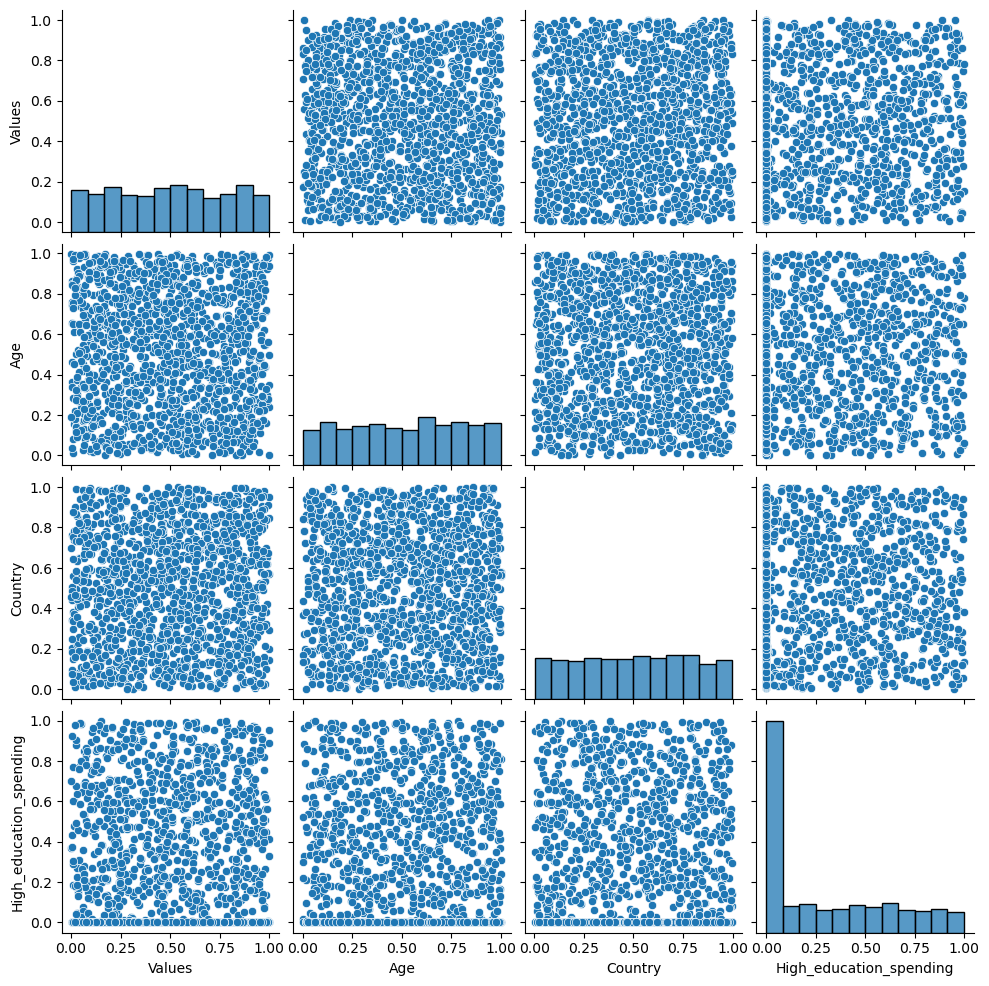

In [120]:
sns.pairplot(df[["Values", "Age", "Country", "High_education_spending"]]);
fig.suptitle("Pairplot of some features");

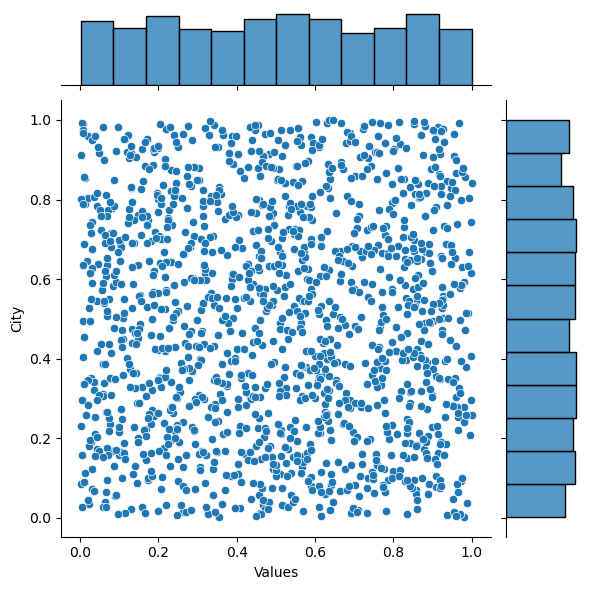

In [121]:
sns.jointplot(x="Values", y="City", data=df, kind="scatter");

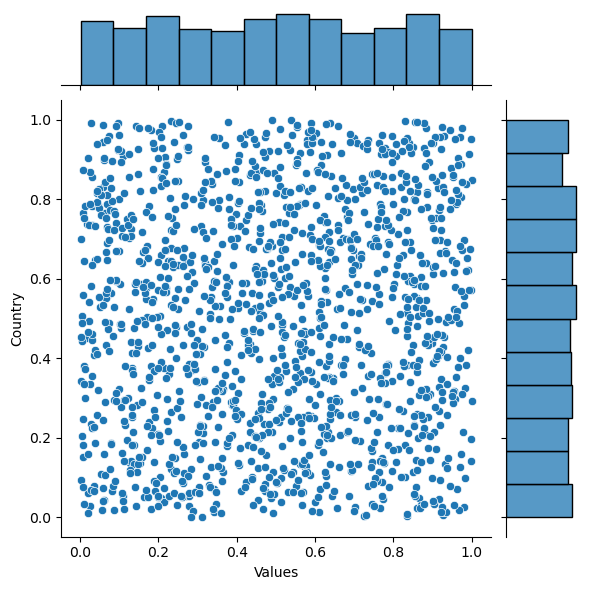

In [122]:
sns.jointplot(x="Values", y="Country", data=df, kind="scatter");

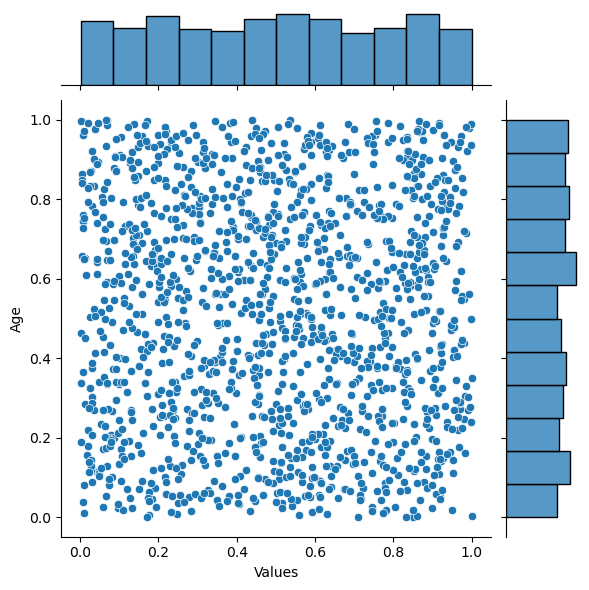

In [123]:
sns.jointplot(x="Values", y="Age", data=df, kind="scatter");

In [124]:
from matplotlib.cm import ScalarMappable

In [134]:
def single (num, title):
    # Horizontal cartesian coords
    hcoord = [c[0] for c in coord]

    # Vertical cartersian coords
    #vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]
    vcoord = [c[1] for c in coord]

    fig, ax = plt.subplots(1)
    #ax.set_aspect('equal')
    for x, y, f in zip(hcoord, vcoord, featureList[:, num]):
        colors = to_rgba(tuple([1 - round(f, 3), 1 - round(f, 3), 1 - round(f, 3)]))
        hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor=colors, alpha=0.2, edgecolor='k')
        ax.add_patch(hex)

    # Also add scatter points in hexagon centres
    colors = np.array([list(to_rgba([ 1 - round(f, 3), 1 - round(f, 3),  1 - round(f, 3)])) for f in featureList[:, num]])
    colordots = ax.scatter(hcoord, vcoord, c = colors, alpha=0.5)
    norm = plt.Normalize(colors[:, 2].min(), colors[:, 2].max())
    sm = ScalarMappable(norm=norm, cmap='Greys')
    fig.colorbar(sm,  ax=plt.gca()) 
    ax.set_title(f"{title}")
    plt.tight_layout()
    plt.show()

In [129]:
def double (numArr, titleAr):
    fig,axs = plt.subplots(1,2, figsize = plt.figaspect(0.4))
    k = 0
    for j in numArr:
            
        # Horizontal cartesian coords
        hcoord = [c[0] for c in coord]

        # Vertical cartersian coords
        #vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]
        vcoord = [c[1] for c in coord]
        
        
        for x, y, f in zip(hcoord, vcoord, featureList[:,j]):
            colors = to_rgba(tuple([1 - round(f, 3), 1 - round(f, 3), 1 - round(f, 3)]))
            hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor=colors, alpha=0.2, edgecolor='k')
            axs[k].add_patch(hex)
            
        colors = np.array([list(to_rgba([ 1 - round(f, 3), 1 - round(f, 3), 1 - round(f, 3)])) for f in featureList[:,j]])
        colordots = axs[k].scatter(hcoord, vcoord, c = colors, alpha=0.5)
        k +=1;
            
    norm = plt.Normalize(colors[:, 2].min(), colors[:, 2].max())
    sm = ScalarMappable(norm=norm, cmap='Greys')
    fig.colorbar(sm,  ax=plt.gca()) 
    axs[0].set_title(f"{titleAr[0]}")
    axs[1].set_title(f"{titleAr[1]}")
    fig.tight_layout()

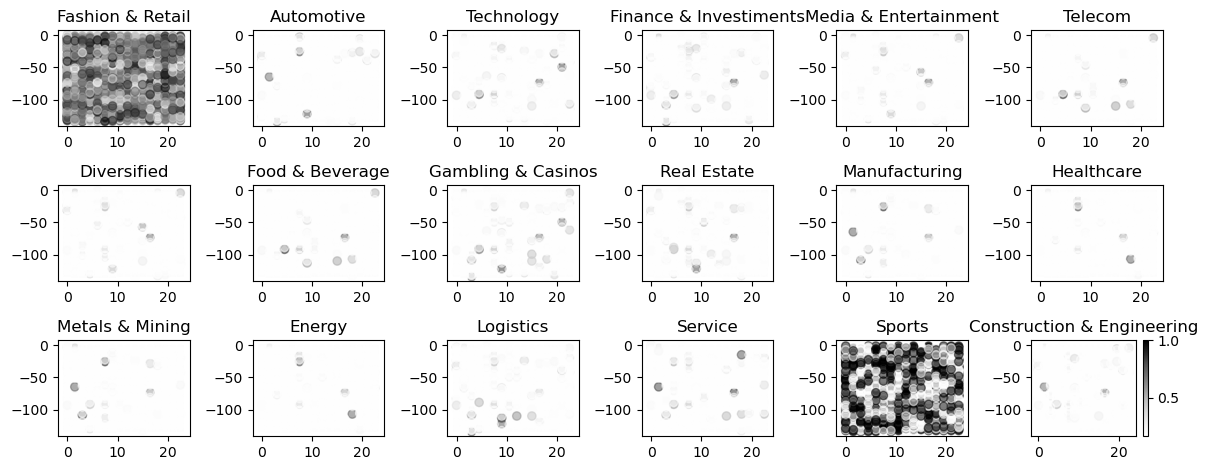

In [131]:
fig,axs = plt.subplots(3,6, figsize = plt.figaspect(0.4))
for i in range(3):
    for j in range(6):
        
        # Horizontal cartesian coords
        hcoord = [c[0] for c in coord]

        # Vertical cartersian coords
        #vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]
        vcoord = [c[1] for c in coord]
        
        
        for x, y, f in zip(hcoord, vcoord, featureList[:, i * 4 + j]):
            colors = to_rgba(tuple([1 - round(f, 3), 1 - round(f, 3), 1 - round(f, 3)]))
            hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor=colors, alpha=0.2, edgecolor='k')
            axs[i][j].add_patch(hex)
            
        colors = np.array([list(to_rgba([1 - round(f, 3), 1 - round(f, 3),  1 - round(f, 3)])) for f in featureList[:, i * 4 + j]])
        colordots = axs[i][j].scatter(hcoord, vcoord, c = colors, alpha=0.5)

norm = plt.Normalize(colors[:, 2].min(), colors[:, 2].max())
sm = ScalarMappable(norm=norm, cmap='Greys')
fig.colorbar(sm,  ax=plt.gca())
axs[0][0].set_title("Fashion & Retail")
axs[0][1].set_title("Automotive")
axs[0][2].set_title("Technology")
axs[0][3].set_title("Finance & Investiments")
axs[0][4].set_title("Media & Entertainment")
axs[0][5].set_title("Telecom")
axs[1][0].set_title("Diversified")
axs[1][1].set_title("Food & Beverage")
axs[1][2].set_title("Gambling & Casinos")
axs[1][3].set_title("Real Estate")
axs[1][4].set_title("Manufacturing")
axs[1][5].set_title("Healthcare")
axs[2][0].set_title("Metals & Mining")
axs[2][1].set_title("Energy")
axs[2][2].set_title("Logistics")
axs[2][3].set_title("Service")
axs[2][4].set_title("Sports")
axs[2][5].set_title("Construction & Engineering")
fig.tight_layout()

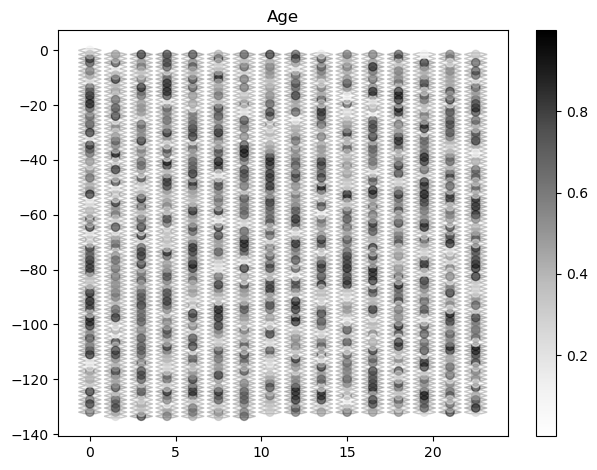

In [135]:
single(19, "Age")

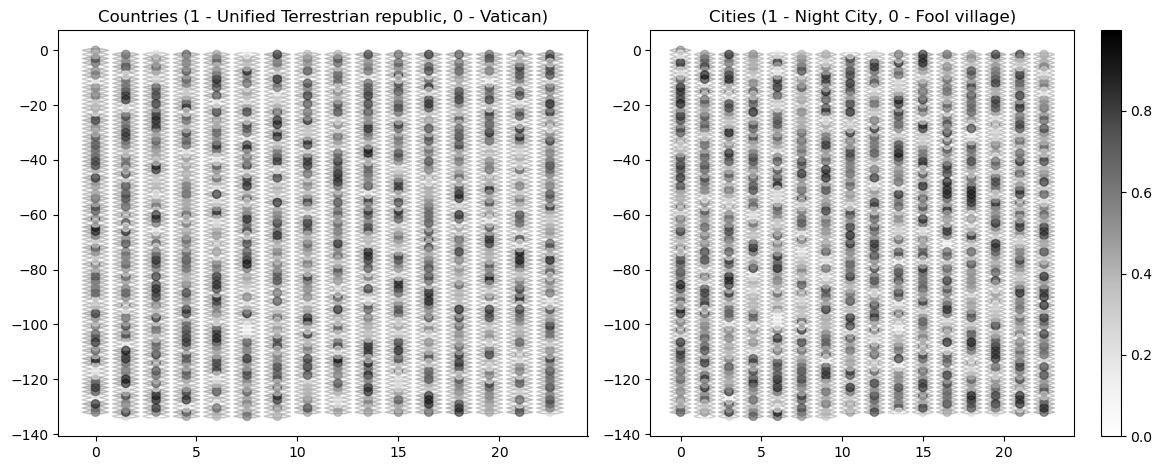

In [136]:
titleArr = ["Countries (1 - Unified Terrestrian republic, 0 - Vatican)", "Cities (1 - Night City, 0 - Fool village)"]
numArr = [20, 21]
double(numArr, titleArr)

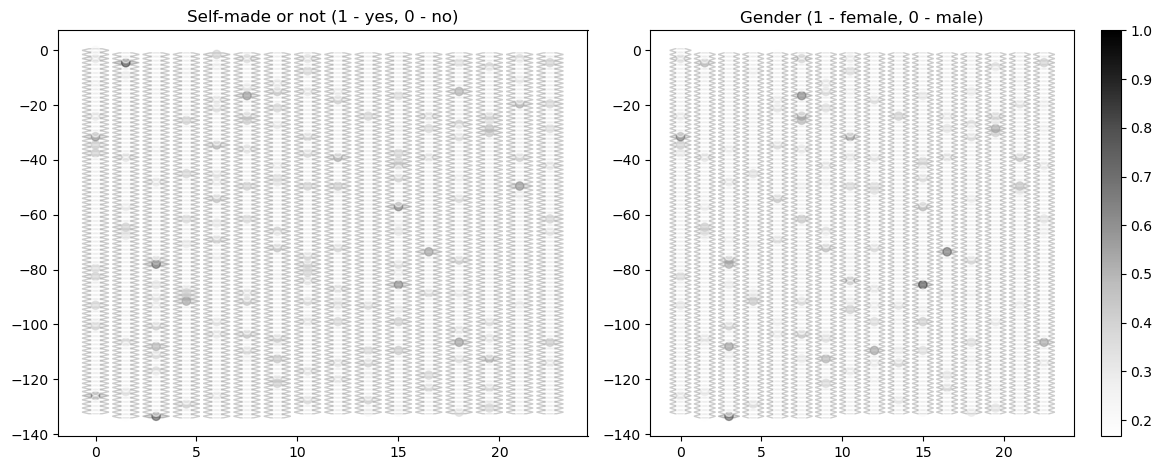

In [137]:
titleArr = ["Self-made or not (1 - yes, 0 - no)", "Gender (1 - female, 0 - male)"]
numArr = [22, 29] 
double(numArr, titleArr)

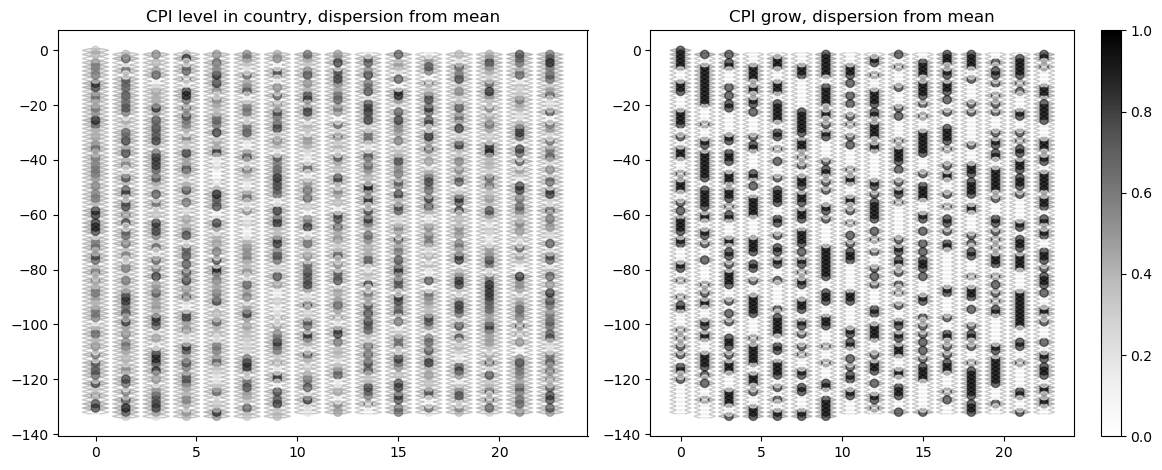

In [148]:
titleArr = ["CPI level in country, dispersion from mean", "CPI grow, dispersion from mean"]
numArr = [-8, -7] 
double(numArr, titleArr)
        

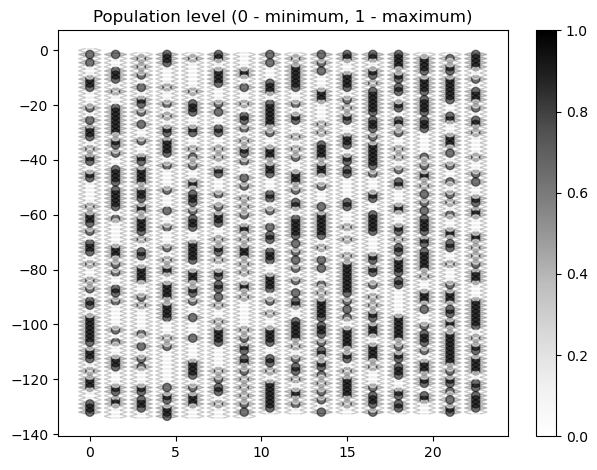

In [149]:
single(-1, "Population level (0 - minimum, 1 - maximum)")

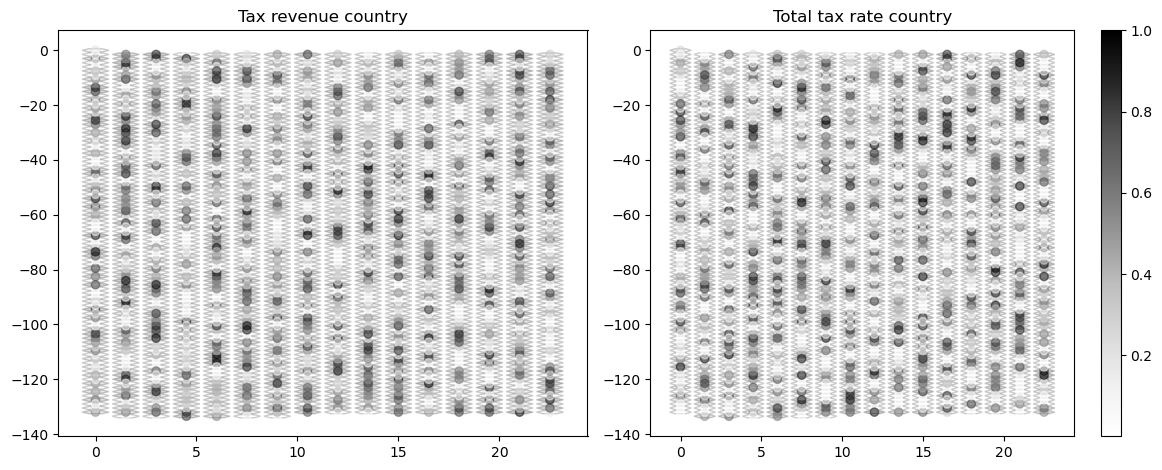

In [150]:
titleArr = ["Tax revenue country", "Total tax rate country"]
numArr = [-3, -2] 
double(numArr, titleArr)

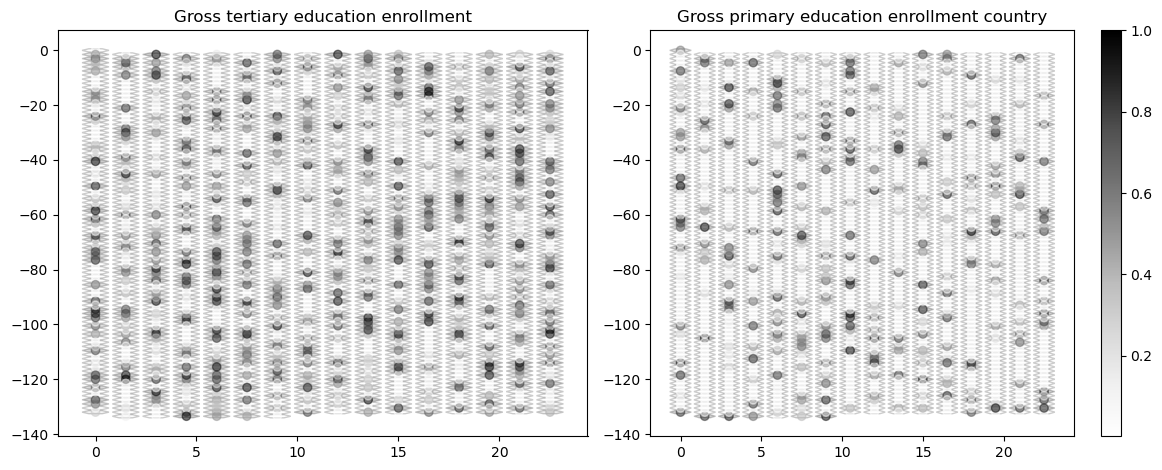

In [151]:
titleArr = ["Gross tertiary education enrollment", "Gross primary education enrollment country"]
numArr = [-6, -5] 
double(numArr, titleArr)

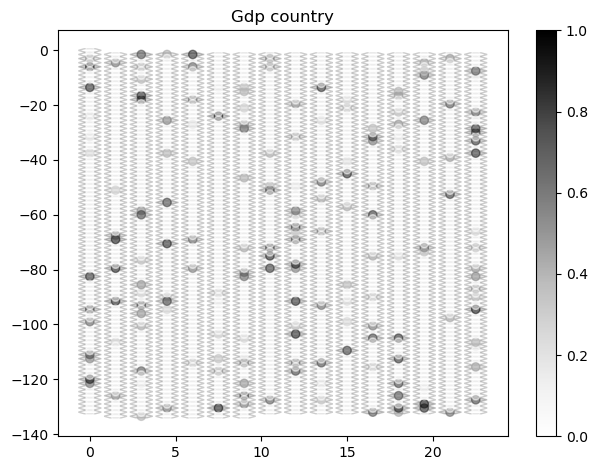

In [152]:
single(-4, "Gdp country")

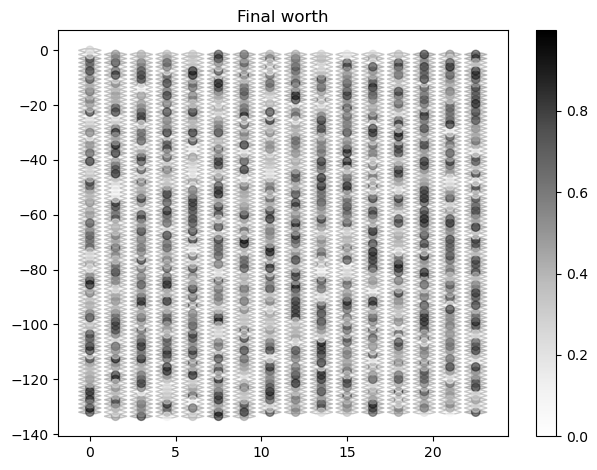

In [153]:
single(0, "Final worth")

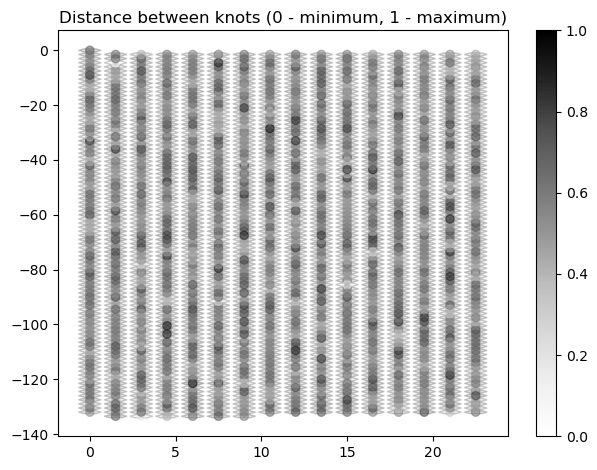

In [156]:
# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartersian coords
#vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]
vcoord = [c[1]  for c in coord]

fig, ax = plt.subplots(1)
#ax.set_aspect('equal')
for x, y, f in zip(hcoord, vcoord, distSort):
    f_norm = (f-np.min(distSort))/(np.max(distSort)-np.min(distSort))
    colors = to_rgba(tuple([ round(f_norm, 3), round(f_norm, 3), round(f_norm, 3)]))
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor=colors, alpha=0.2, edgecolor='k')
    ax.add_patch(hex)

# Also add scatter points in hexagon centres
colors = np.array([list(to_rgba([ round((f-np.min(distSort))/(np.max(distSort)-np.min(distSort)), 3)
                                 , round((f-np.min(distSort))/(np.max(distSort)-np.min(distSort)), 3),
                                 round((f-np.min(distSort))/(np.max(distSort)-np.min(distSort)), 3)])) for f in distSort])
colordots = ax.scatter(hcoord, vcoord, c = colors, alpha=0.5)
norm = plt.Normalize(colors[:, 2].min(), colors[:, 2].max())
sm = ScalarMappable(norm=norm, cmap='Greys')
fig.colorbar(sm,  ax=plt.gca()) 
ax.set_title("Distance between knots (0 - minimum, 1 - maximum)")
plt.tight_layout()
plt.show()

In [209]:
import plotly.graph_objects as go

def interactiveMap(title):
    # Создание данных для примера

    lat = hcoord
    lon = vcoord
    names = df["Names"]
    hovertemplate = 'lon: %{lon}<br>lat: %{lat}<br> values: %{z}<br>name: %{customdata}<extra></extra>'

    fig = go.Figure(go.Densitymapbox(lat=lat, lon=lon, radius=10, z=df[f'{title}'], customdata=names,
                                hovertemplate=hovertemplate, opacity = 1, name = "Names"))
    
    fig.update_layout(
    title={
        'text': f"{title}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    )
    
    fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=-60, mapbox_center_lat=10,  mapbox_zoom=2)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [210]:
interactiveMap("Values")

In [211]:
interactiveMap("Gender")

In [212]:
interactiveMap("Sports")

In [213]:
interactiveMap("Automotive")